## PARSPORT DVH Analysis
DVHs are stored in excel files for each patient.
These will be imported into a pandas multilevel database for manipulation.
Should be able to pull out all 'r_parotid' dvh's for example.

Notes:
- Each patient spreadsheet has one tab containing relative (%) data, one containing abolute (cc) data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#qt
#import os
#cwd = os.getcwd()

In [2]:
## read in full dataset

full = False

if full:
    df = pd.read_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_pkl.pkl")
else:
    file_to_load = r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_update_16Sep16.pkl"
    df = pd.read_pickle(file_to_load)
#df = pd.read_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_hdf.hdf5")
#df.to_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_pkl.pkl")
df.head()

pt_id             1001                                            1002  \
side             right                                           bilat   
side_dif  -21.99190852                                    -37.32848122   
type         conformal                                            imrt   
structure   dose_(cgy)   cord l_parotid r_parotid pharynx   dose_(cgy)   
0                  0.0  100.0     100.0     100.0   100.0          0.0   
1                  1.0  100.0     100.0     100.0   100.0          1.0   
2                  2.0  100.0     100.0     100.0   100.0          2.0   
3                  3.0  100.0     100.0     100.0   100.0          3.0   
4                  4.0  100.0     100.0     100.0   100.0          4.0   

pt_id                                        1003    ...           6003  \
side                                        bilat    ...           left   
side_dif                              -13.5860905    ...    11.93829139   
type                                    conformal    ...           imrt   
structure r_parotid l_parotid pharynx  dose_(cgy)    ...      r_parotid   
0             100.0     100.0   100.0         0.0    ...          100.0   
1             100.0     100.0   100.0         1.0    ...          100.0   
2             100.0     100.0   100.0         2.0    ...          100.0   
3             100.0     100.0   100.0         3.0    ...          100.0   
4             100.0     100.0   100.0         4.0    ...          100.0   

pt_id            6004                            6005                      \
side             left                            left                       
side_dif  38.41823644                     3.022384226                       
type             imrt                       conformal                       
structure  dose_(cgy) l_parotid r_parotid  dose_(cgy) l_parotid r_parotid   
0                 0.0     100.0     100.0         0.0     100.0     100.0   
1                 1.0     100.0     100.0         1.0     100.0     100.0   
2                 2.0     100.0     100.0         2.0     100.0     100.0   
3                 3.0     100.0     100.0         3.0     100.0     100.0   
4                 4.0     100.0     100.0         4.0     100.0     100.0   

pt_id            6006                      
side             left                      
side_dif  4.303579758                      
type        conformal                      
structure  dose_(cgy) l_parotid r_parotid  
0                 0.0     100.0     100.0  
1                 1.0     100.0     100.0  
2                 2.0     100.0     100.0  
3                 3.0     100.0     100.0  
4                 4.0     100.0     100.0  

[5 rows x 259 columns]

In [4]:
## save df as csv file to add in additional headers?
#df.to_csv(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_csv1.csv")

In [14]:
## for importing a csv file after editing.
#file = r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_csv1.csv"
# 
#header_rows = [0,1,2,3,4] # rows containing header info
#df_load = pd.read_csv(file,header=header_rows, index_col=0)
#df_load.head()

In [15]:
## Create list of all dvh files in specified directory for analysis
#path = "Data to Import/parsport/dvhs_sorted/"
#filenames = os.listdir(path)
#fullpath = [path + s for s in filenames]
#filenames[0:3]
#fullpath[0:5]

In [16]:
## create filename and apth variable ready to import

# file_type = 'hdf'

# if file_type == 'excel':
#     file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final.xlsx"
#     print(file_all_data_final)
# elif file_type == 'csv':
#     file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_csv.csv"
#     print(file_all_data_final)
# elif file_type == 'pickle':
#     file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_pickle.pickle"
#     print(file_all_data_final)
# elif file_type == 'hdf':
#     file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_hdf5.hdf5"
#     print(file_all_data_final)
# else:
#     print("Specify correct filetype to continue with import")

In [17]:
## Import into dataframe

# if file_type == 'excel':
#     df = pd.read_excel(file_all_data_final)
# elif file_type == 'csv':
#     df = pd.read_csv(file_all_data_final)
# elif file_type == 'pickle':
#     df = pd.read_pickle(file_all_data_final)
# elif file_type == 'hdf':
#     df = pd.read_hdf(file_all_data_final)
# else:
#     print("Specify correct filetype to continue with import")

# df.rename(columns={'1011_r_parotidgland': '1011_r_parotid',
#                    '1011_l_parotidgland': '1011_l_parotid',
#                    '1012_il_r_parotid': '1012_r_parotid'},
#           inplace=True)

# df = df.rename(columns=lambda x: x.replace('1037sg', '1037'))
# df = df.rename(columns=lambda x: x.replace('1038sg', '1038'))

In [18]:
### Save the dataframe if required. - Already have the whoel thing saved using this.
#df.to_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final.hdf5","parsport_all", mode ="w", format='t')

In [19]:
## all data in format than cannot be queried on import
#file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_hdf5-headings.hdf5"

#file_to_use = 'small' # or 'full'
#file_to_use = 'full'
#
#if file_to_use == 'full':
#    
#    ## all data in format than can be queried on import
#    file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final.hdf5"
#    df = pd.read_hdf(file_all_data_final)
#else:
#    ## smaller dataset to work with only containing parotid and some other things
#    file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_small.pkl"
#    df = pd.read_pickle(file_all_data_final)
#
## single patient set to use for testing
#file_all_data_final = "Data to Import\parsport\dvhs_single_file\parsport_dvh_1001_only.hdf5" 
#
#df.head()#.describe()

In [3]:
## create dataframe with only dose_(cgy), l_parotid,r_parotid,pharynx,ptv1

run_this = False

if run_this == True:
    include_structs = ['dose_(cgy)','cord','l_parotid','r_parotid','pharynx'] ## Structures (columns) to exclude. Could do with axis=0 to exclude rows

    ## select single structure for all patients
    #df_structs = df.xs('r_parotid', level='structure',axis=1, drop_level=False)

    ## select single structure form single patient
    #df_structs = df.xs(('1002','r_parotid'), level=('pt_id','structure'), axis=1)

    ## select multiple structures from all patients
    df_structs = df.ix[:,df.columns.get_level_values('structure').isin(include_structs)]
    # this is providing a tuple for each level. First level is all (:), then second level says its in the list 

    #data.ix[:,data.columns.get_level_values(1).isin({"a", "c"})]

    df_structs.head()

    ## save as pickle file
    df_structs.to_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_pkl_small.pkl")

### Add a column which indicates if l_parotid or r_parotid has the greatest dose
- Maximum point dose?
- Maximum dose ata  given %vol?
- Mean dose?
- How to do this for all the patients?

- loop through each patient?

In [4]:
df.head(3)

pt_id             1001                                            1002  \
side             right                                           bilat   
side_dif  -21.99190852                                    -37.32848122   
type         conformal                                            imrt   
structure   dose_(cgy)   cord l_parotid r_parotid pharynx   dose_(cgy)   
0                  0.0  100.0     100.0     100.0   100.0          0.0   
1                  1.0  100.0     100.0     100.0   100.0          1.0   
2                  2.0  100.0     100.0     100.0   100.0          2.0   

pt_id                                        1003    ...           6003  \
side                                        bilat    ...           left   
side_dif                              -13.5860905    ...    11.93829139   
type                                    conformal    ...           imrt   
structure r_parotid l_parotid pharynx  dose_(cgy)    ...      r_parotid   
0             100.0     100.0   100.0         0.0    ...          100.0   
1             100.0     100.0   100.0         1.0    ...          100.0   
2             100.0     100.0   100.0         2.0    ...          100.0   

pt_id            6004                            6005                      \
side             left                            left                       
side_dif  38.41823644                     3.022384226                       
type             imrt                       conformal                       
structure  dose_(cgy) l_parotid r_parotid  dose_(cgy) l_parotid r_parotid   
0                 0.0     100.0     100.0         0.0     100.0     100.0   
1                 1.0     100.0     100.0         1.0     100.0     100.0   
2                 2.0     100.0     100.0         2.0     100.0     100.0   

pt_id            6006                      
side             left                      
side_dif  4.303579758                      
type        conformal                      
structure  dose_(cgy) l_parotid r_parotid  
0                 0.0     100.0     100.0  
1                 1.0     100.0     100.0  
2                 2.0     100.0     100.0  

[3 rows x 259 columns]

In [5]:
## need to work out how to select specific things....

## filter based on a single index level. e.g. all right sided
#df_test = df.xs('right',axis=1,level='side')

df_imrt = df.xs('imrt',level='type',axis=1)
df_conformal = df.xs('conformal',level='type',axis=1)

## mutliple levels of with .xs
df_test = df.xs(['right','l_parotid'],level=['side','structure'],axis=1)
df_imrt.head()

pt_id             1002                                     1004            \
side             bilat                                    right             
side_dif  -37.32848122                             -41.54533567             
structure   dose_(cgy) r_parotid l_parotid pharynx   dose_(cgy) l_parotid   
0                  0.0     100.0     100.0   100.0          0.0     100.0   
1                  1.0     100.0     100.0   100.0          1.0     100.0   
2                  2.0     100.0     100.0   100.0          2.0     100.0   
3                  3.0     100.0     100.0   100.0          3.0     100.0   
4                  4.0     100.0     100.0   100.0          4.0     100.0   

pt_id                              1008              ...          4006  \
side                               left              ...          left   
side_dif                    37.38281693              ...    36.1064035   
structure r_parotid pharynx  dose_(cgy) r_parotid    ...     l_parotid   
0             100.0   100.0         0.0     100.0    ...         100.0   
1             100.0   100.0         1.0     100.0    ...         100.0   
2             100.0   100.0         2.0     100.0    ...         100.0   
3             100.0   100.0         3.0     100.0    ...         100.0   
4             100.0   100.0         4.0     100.0    ...         100.0   

pt_id            6002                            6003                      \
side             left                            left                       
side_dif  44.18529432                     11.93829139                       
structure  dose_(cgy) l_parotid r_parotid  dose_(cgy) l_parotid r_parotid   
0                 0.0     100.0     100.0         0.0     100.0     100.0   
1                 1.0     100.0     100.0         1.0     100.0     100.0   
2                 2.0     100.0     100.0         2.0     100.0     100.0   
3                 3.0     100.0     100.0         3.0     100.0     100.0   
4                 4.0     100.0     100.0         4.0     100.0     100.0   

pt_id            6004                      
side             left                      
side_dif  38.41823644                      
structure  dose_(cgy) l_parotid r_parotid  
0                 0.0     100.0     100.0  
1                 1.0     100.0     100.0  
2                 2.0     100.0     100.0  
3                 3.0     100.0     100.0  
4                 4.0     100.0     100.0  

[5 rows x 134 columns]

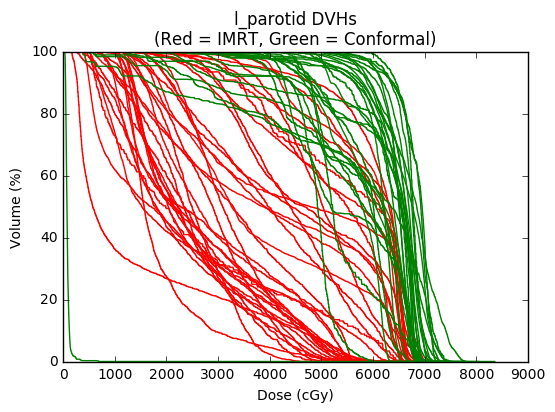

In [8]:
## plot all IMRT ptv doses

struct = 'l_parotid'

imrt_x = df_imrt.xs('dose_(cgy)',level='structure',axis=1)
imrt_y = df_imrt.xs(struct,level='structure',axis=1)
conformal_x = df_conformal.xs('dose_(cgy)',level='structure',axis=1)
conformal_y = df_conformal.xs(struct,level='structure',axis=1)

ax = plt.plot(imrt_x,imrt_y, color='red')
ax = plt.plot(conformal_x,conformal_y, color='green')
plt.title(struct + ' DVHs\n(Red = IMRT, Green = Conformal)')
plt.xlabel('Dose (cGy)')
plt.ylabel('Volume (%)')
#plt.show()




In [20]:
## select a specific row in a df for a petient structure

## order of levels: pt_id, side, side_dif, structure

## select specific patient
pt = '1001'
pt_df = df[pt]
#print(pt_df)
## select structure

side = 'right'

pt_df_side = pt_df[side]
#print(pt_df_side)
struct = 'l_parotid'
#pt_struct_df = pt_df[struct]

## select specific dose (cGy)
dose_point = 5000

pt_df_side_dose = pt_df_side[pt_df_side.columns == 'l_parotid']

#pt_struct_df[dose_point]

## combined

#ans = df[pt][:][:][struct][dose_point]
#print(ans)

ValueError: Item wrong length 5 instead of 8355.

In [ ]:
## comparison function for parotids

def which_parotid(left,right):
    if left > right:
        result = 'left'
    elif right > left:
        result = 'right'
    elif left == right:
        result = 'equal'
    else:
        result = 'NA'
    return result

print(which_parotid(7,8))
    

In [ ]:
## create list of the side in which the mean dose is greatest for each patient
## combinie into a dictionary

patients = list(df.columns.levels[0])
sides = []
difs = []

for i in patients:
    pt_df = df[i]
    l_parotid_mean = pt_df['l_parotid'].mean()
    r_parotid_mean = pt_df['r_parotid'].mean()
    par_dif = l_parotid_mean - r_parotid_mean
    difs.append(par_dif)
    side = which_parotid(l_parotid_mean,r_parotid_mean)
    sides.append(side)
#print(sides)
#print(patients)
#pt_difs = dict(zip(patients,difs))
#pt_sides = dict(zip(patients,sides))
#pt_side_dif = dict(zip(patients,zip(sides,difs)))
pt_side_dif = list(zip(patients,sides,difs))
#print(pt_side_dif)
## [0] is the patient, [1] is the side [2] is the difference **# positive means left side is higher


## make a dictionary to look up position of a paitent within the list for convenience

pt_dict = {}
j = 0 # iterator for numbering list position
for i in patients:
    pt_dict[i] = j
    j = j+1
    
#print(pt_dict['1003'])

#pt_side_dif[pt_dict['4002']]


In [ ]:
## sort the lsit fo patients by the absolute difference
#sorted(pt_side_dif_list,key=lambda x: abs(x[1][1]))

In [ ]:
df['4002']
plt.plot(df['4002']['dose_(cgy)'],df['4002']['l_parotid'])
plt.plot(df['4002']['dose_(cgy)'],df['4002']['r_parotid'])

### Add another layer of headers to include the side and difference.
- these could be updated to inlcude 'unilateral' as an alternative side result.
    - The which_side() would need updating for this.
    - could also include the treatment type (IMRT/parallel opposed etc)


In [ ]:
## get values out of lists for adding into new multi level headings

the_pts = [i[0] for i in pt_side_dif]
the_sides = [i[1] for i in pt_side_dif]
the_difs = [i[2] for i in pt_side_dif]

side_tpl = list(zip(the_pts,the_sides,the_difs))

pt_counts = []

for i in the_pts:
    pt_ct_tpl = (i,len(df[i].columns))
    pt_counts.append(pt_ct_tpl)

## get list of patients into a tuple from the original df

#patients = list(df.columns.levels[0]) # for getting unique values
patients = list(df.columns.get_level_values(0)) # for getting all values for each column
#structures = list(df.columns.levels[1])
structures = list(df.columns.get_level_values(1))
pat_struc = list(zip(patients,structures))
patients[:8]

## need to duplicate the sides and difference the same number of times as each different
## structure appears for that particular patient
      
## list of patients with the number of times to repeat = pt_counts
#print(pt_counts)
## list of patients with the side and difference = side_tpl
#print(side_tpl)

full_list = []
counter = 0
for i in range(len(side_tpl)):
    #print(i)
    for j in range(pt_counts[i][1]):
        mini_tpl = (side_tpl[i][0],side_tpl[i][1],side_tpl[i][2],structures[counter])
        full_list.append(mini_tpl)
        counter = counter + 1

        ## create the MultiIndex object from the list of tuples
new_index = pd.MultiIndex.from_tuples(full_list,names=['pt_id', 'side', 'side_dif','structure'])
print(new_index[0])

In [ ]:
#df.describe()

In [ ]:
## create new DF with the data from the old and new index?

df = pd.DataFrame(df.values,columns=new_index)
#new_df.describe()
#df.to_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides.pkl")


## save as hdf5 file
df.to_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_hdf.hdf5","all_sides")

In [ ]:
df

In [ ]:
## save new dataframe as pickle
new_df.to_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides.pkl")


#### Creating smaller dataset for specific structures

In [ ]:
#df.columns.get_level_values(1) ## Get lists of each fo the levels values (use .index. for rows)

structure_of_interest = 'r_parotid'

## Selecting all r_parotids
df1 = df.xs(structure_of_interest,level='structure', axis=1, drop_level=False)
df1.head(3)

### Plotting specific structures
 - Plotting can be done with matplotlib or using the df.plot() command

In [ ]:
#%matplotlib inline
#plt.plot(df1, label=df1.columns)
#plt.legend(fontsize=5)
#plt.show()

In [ ]:
%matplotlib qt
fig1 = df1.plot(title=("Structure: " + structure_of_interest), legend=False) ## Thsi does have correct legend, but might orefer to use matplotlib...?
#fig1.legend(fontsize=5)
fig1.set_xlabel('Dose (cGy)')
fig1.set_ylabel('Volume (%)')
#fig1.set_title = structure_of_interest

#### Picking specific patients

In [ ]:
patient_of_interest = '1002'
df_pt = df.xs(patient_of_interest, level='pt_id', axis=1, drop_level=False)
#df1 = df.xs(structure_of_interest,level='structure', axis=1)
df_pt.head(3)

### Plot of specifc patient

In [ ]:
exclude = ['dose_(cgy)','body'] ## Structures (columns) to exclude. Could do with axis=0 to exclude rows

fig_pt = df_pt.drop(exclude, axis=1, level='structure').plot(title=("Patient ID: " + patient_of_interest),legend=False)

fig_pt.set_xlabel('Dose (cGy)')
fig_pt.set_ylabel('Volume (%)')
#fig_pt.legend(fontsize=8, loc='upper left')
#fig_pt.set_ylim(0,105)

#### Select a range of patients
e.g. provide a list of patients fo interest and select those ready for plotting/stats

In [ ]:
### Select a specific structure from a specific patient
patient_structure_of_interest = ('1001','r_parotid')
df_pt_specific = df.xs(patient_structure_of_interest, level=('pt_id','structure'), axis=1, drop_level=False)
#df1 = df.xs(structure_of_interest,level='structure', axis=1)
df_pt_specific.head(3)

### Calculate mean of selected structure.
- Need to first calculate the differential dvh to work with.
- If move the required values into a numpy array can setup a function to do this
- Mean dose to aprotid is a good indicator of side effects: http://www.ncbi.nlm.nih.gov/pubmed/20609609


In [ ]:
## Calc differential dvh

df_parotid = df['r_parotid']
#print(df['r_parotid'])

df_dif = df_parotid.diff(periods=1).fillna(0).abs()
#df_pt_specific.plot()
#print(df_dif)
vol_array = np.array(df_dif.values)
dose_array = np.array(df_dif.index.values)
vol_dose_array = np.array(vol_array*dose_array)
#print(vol_dose_array)

mean_calc = np.sum(vol_dose_array)/np.sum(vol_array)

print("Mean Dose (cGy): " + str(mean_calc))

In [ ]:
## save as hdf5 file
df_pt_specific.to_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_1001_r_parotid_hdf5.hdf5","r-parotid_1001")

In [ ]:
print(mean_calc)
#print(vol_array.max())

In [ ]:
### Select all data from a range of patients

select_pts = ['1001','1002','1003'] ## Patients (columns) to exclude. Could do with axis=0 to exclude rows

df_pt_range = df[select_pts]
df_pt_range.head(3)
#df_pt.describe()

In [ ]:
### Create a list of which parotid is recieving maximum dose for each patient.
## - 1 Make df with only r/l_parotid structures
## - 2 Check if r_parotid > l_parotid (mean dose) [mean dose may need calculating - or use D90 or similar to see high doses]
## - 3 Store results in a new column (1=right, 0=left or 'l'/'r')
## - 4 Create new column to contain maximum parotid doses. i.e. if l in col then max_parotid = il_calc_parotid
## - Can use this il_calc_parotid to plot/analyse stats.

#select_pts = ['1001','1002','1003'] ## Patients (columns) to exclude. Could do with axis=0 to exclude rows

#df_pt_range = df[select_pts]
#df_pt_range.head(3)

structures_of_interest = ['l_parotid','r_parotid']

## Selecting all r_parotids

df_parotids = df[structures_of_interest]
df_parotids.head(3)


In [ ]:
### Select a range of patients
patients_of_interest = ('1002','1003')
df_pts = df.xs(patients_of_interest, level='pt_id', axis=1, drop_level=False)
#df1 = df.xs(structure_of_interest,level='structure', axis=1)
df_pts.head()

### Get stats at a given dose point
- D90 (useful for targets)
- V50 (useful for OARs)

In [ ]:
### Extract additional level based on ID

#df1 = df_test

## get list of all headers in dataframe
headers = list(df.columns.values)

## split at underscore to create tuple of pt id and structure
filtered_headers = [i.split('_', 1) for i in headers]

## get unique values and sort them for use
#patients = sorted(list(set(filtered_headers)))

## separate out id and structure into lists if needed
heads = list(zip(*filtered_headers))
#pt_id = heads[0]
#structure = heads[1]

## change columns to be those in the tuple which will give a multilevel index with appropriate labels
df.columns = pd.MultiIndex.from_tuples(filtered_headers,names=['pt_id', 'structure'])
## rename the index
df.index.name = 'dose'

df.head()

In [ ]:
## save as hdf5 file
#df.to_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_hdf5-headings.hdf5",'parsport_headings')

In [ ]:
non_dose_cols = [c for c in df.columns if c != 'dose_(cgy)']

df=df[non_dose_cols]

df.describe()

In [ ]:
# Specifiy if want relative or absolute volume data
## Note only useful during initial import. Relative volumes have been extracted for use.
rel = True

if rel == True:
    sheet_name = "Relative volumes (%)"
else:
    sheet_name = "Absolute volumes (cc)"

### Import single file to test

In [ ]:
#filepath = 'Data to Import/parsport/dvhs_sorted/1001.xls'
filepath = path + filenames[1]

#fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
#print(fullpath) #note forward and backward slashes in output

#all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data = pd.read_excel(filepath, sheetname=sheet_name, index_col=0)
all_data.head(3)
#all_data.set_index('1002_dose_(cgy)')
#all_data.describe()

## Import all files into single dataframe

In [ ]:
## Work with just a few results
path = r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\DVHs\To use\files-orig+sort+clean2+header_rename - Copy"
path = path + "\\"
filenames = os.listdir(path)
fullpath = [path + s for s in filenames]
fullpath = fullpath[:5]
#filenames[:5]61

###### This imports all files within a folder. ONLY USE IF REQUIRED AS MEMORY INTENSIVE
df_5 = pd.concat((pd.read_excel(f, sheetname=sheet_name, index_col=0) for f in fullpath), axis=0)
#df_all = pd.concat((pd.read_pickle(f) for f in fullpath), axis=0)
df_5.head(3)

In [ ]:
#df70.to_pickle(path+"parsport_dvh_61-70_pickle.pickle")
#df.to_csv(path+"parsport_dvh_all_final_csv.csv", index=False)

In [ ]:
### Save data as csv for future import
#df.to_csv(path+"parsport_dvh_all.csv")

In [ ]:
## save as hdf5 file
#df.to_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_final_hdf5.hdf5",'parsport')

### Get a list of each patient to aid plotting
- Patients 1011 and 1012 have headings renamed after import for consistency with r_parotid.
- Patients all have 'xxxx_' for consistency

In [ ]:
## get list of all headers in dataframe
headers = list(df.columns.values)
#filtered_headers = [k for k in headers if '1002' in k]

## remove anything after first underscore
filtered_headers = [i.split('_')[0] for i in headers]

## get unique values and sort them for use
patients = sorted(list(set(filtered_headers)))

#patients.remove('1011') ## These need renaming for consistency
#patients.remove('1012')

#patients = ['1001','1002', '1003', '1004', '1005', '1007']

### Plot the dvhs for all paitents to examine spread

In [ ]:
%matplotlib qt

r_l = 'l'

for x in patients:
    if r_l == 'r':
        plt.plot(df[x + '_dose_(cgy)'],df[x + '_l_parotid'],
                 marker = 'o', markersize=4, markevery=100, label = (x+"_l"))
        plt.title('Right Parotid DVH')
    else:
        plt.plot(df[x + '_dose_(cgy)'],df[x + '_r_parotid'],
                 marker = '^', markersize=4, markevery=100, label = (x+"_r"))
        plt.title('Left Parotid DVH')
#plt.title('Parotid DVH')
plt.xlabel('Dose (cGy)')
plt.ylabel('Volume (%)')
plt.ylim(0,105)
plt.xlim(0,8000)
#plt.legend(loc = 'lower left', fontsize=10)
plt.show()

In [ ]:
## get list of all headers in dataframe
headers = list(df.columns.values)
#filtered_headers = [k for k in headers if '1002' in k]

## remove anything after first underscore
filtered_headers = [i.split('_')[0] for i in headers]

## get unique values and sort them for use
patients = sorted(list(set(filtered_headers)))

patients[:5]

### Create additional level to store patient IDs


In [ ]:
### Create a dataframe for an individual patient
df_1001 = df.filter(regex=r'^1001_')

In [ ]:
### Filter if header contains a text string
df.filter(regex=r'r_parotid').head(3)

In [ ]:
### splitting headers based on first underscore

def process_index(k):
    return tuple(k.split("_",1))

abc = "1001_r_parotid"

splitabc = process_index(abc)
print(splitabc)

In [22]:
df_level = df
df_level.reset_index(inplace=True, drop=True)
#df_level.drop('level_0', axis=1, inplace=True)
df_level.head()

pt_id           1001                                          1002            \
side           right                                         right             
side_dif  -21.991909                                    -37.328481             
structure dose_(cgy)   cord l_parotid r_parotid pharynx dose_(cgy) r_parotid   
0                0.0  100.0     100.0     100.0   100.0        0.0     100.0   
1                1.0  100.0     100.0     100.0   100.0        1.0     100.0   
2                2.0  100.0     100.0     100.0   100.0        2.0     100.0   
3                3.0  100.0     100.0     100.0   100.0        3.0     100.0   
4                4.0  100.0     100.0     100.0   100.0        4.0     100.0   

pt_id                             1003    ...          6003       6004  \
side                             right    ...          left       left   
side_dif                    -13.586091    ...     11.938291  38.418236   
structure l_parotid pharynx dose_(cgy)    ...     r_parotid dose_(cgy)   
0             100.0   100.0        0.0    ...         100.0        0.0   
1             100.0   100.0        1.0    ...         100.0        1.0   
2             100.0   100.0        2.0    ...         100.0        2.0   
3             100.0   100.0        3.0    ...         100.0        3.0   
4             100.0   100.0        4.0    ...         100.0        4.0   

pt_id                               6005                           6006  \
side                                left                           left   
side_dif                       3.022384                       4.303580    
structure l_parotid r_parotid dose_(cgy) l_parotid r_parotid dose_(cgy)   
0             100.0     100.0        0.0     100.0     100.0        0.0   
1             100.0     100.0        1.0     100.0     100.0        1.0   
2             100.0     100.0        2.0     100.0     100.0        2.0   
3             100.0     100.0        3.0     100.0     100.0        3.0   
4             100.0     100.0        4.0     100.0     100.0        4.0   

pt_id                          
side                           
side_dif                       
structure l_parotid r_parotid  
0             100.0     100.0  
1             100.0     100.0  
2             100.0     100.0  
3             100.0     100.0  
4             100.0     100.0  

[5 rows x 259 columns]

In [23]:
### Extract additional level based on ID

## get list of all headers in dataframe
headers = list(df_level.columns.values)

## split at underscore to create tuple
filtered_headers = [i.split('_', 1) for i in headers]

## get unique values and sort them for use
#patients = sorted(list(set(filtered_headers)))

filtered_headers[-10:]

df_level.loc[-1] = filtered_headers
df_level.index = df_level.index + 1
df_level = df_level.sort_index()

df_level.head()
#df.head()


AttributeError: 'tuple' object has no attribute 'split'

In [ ]:
df.info()
#df_1001.info()